# Task lab work # 4

The task contains 2 parts:

    Play with Tensorflow Playground and save a bunch of screenshots (at least 10).
    Solve the classification problem on your dataset from the Lab #2: play with number of neurons, function activation and learning rate (and if you wish play with learning rate schedule)


![Рисунок 1](1.png) 
Дефолтні налаштування - викорисовуємо x1,x2, 2 слоя, 5 і 3 нейрони відповідно. видно, що деякі нейрони були відкинуті, і нейромережа  досить точно виконала свою роботу

![Рисунок 1](2.png) 
спробував інший датасет і додати +1 слой, результат ніякий
![Рисунок 1](3.png) 
а ті самі налаштування з 2 слоями краще навчилася
![Рисунок 1](4.png) 
а от якщо взяти три слоя але змінити регуляцію на L2, то результат ще кращий, бо неправильні варіанти не відкидуються повністю. навіть зібльшивши шум все працює, хоч і трохи гірше
![Рисунок 1](5.png) 
reLU, купа слоїв і купою нейронів, непогано тільки довго
![Рисунок 1](6.png) 
сігмойд тільки з першим датабейзом спрацював, і тільки на двух слоях, зато можна обійтися малою кільківстю нейронів навіть при значному шумі
![Рисунок 1](7.png) 
лініар вочевидь зі складним датабейзом не справляєтьсяб зато с першим легко (форму хвилі йому складновзяти)
![Рисунок 1](8.png)
змінив problem type та класифікацію, з релу. цікавий результат, але неточний. при цьому використовував тільки сінуси.
![Рисунок 1](9.png)
    а це те саме тільки з і сінусами і звичайними іксами вхідними
![Рисунок 1](10.png)
складнив мережу і вийшло зробити спіраль :)

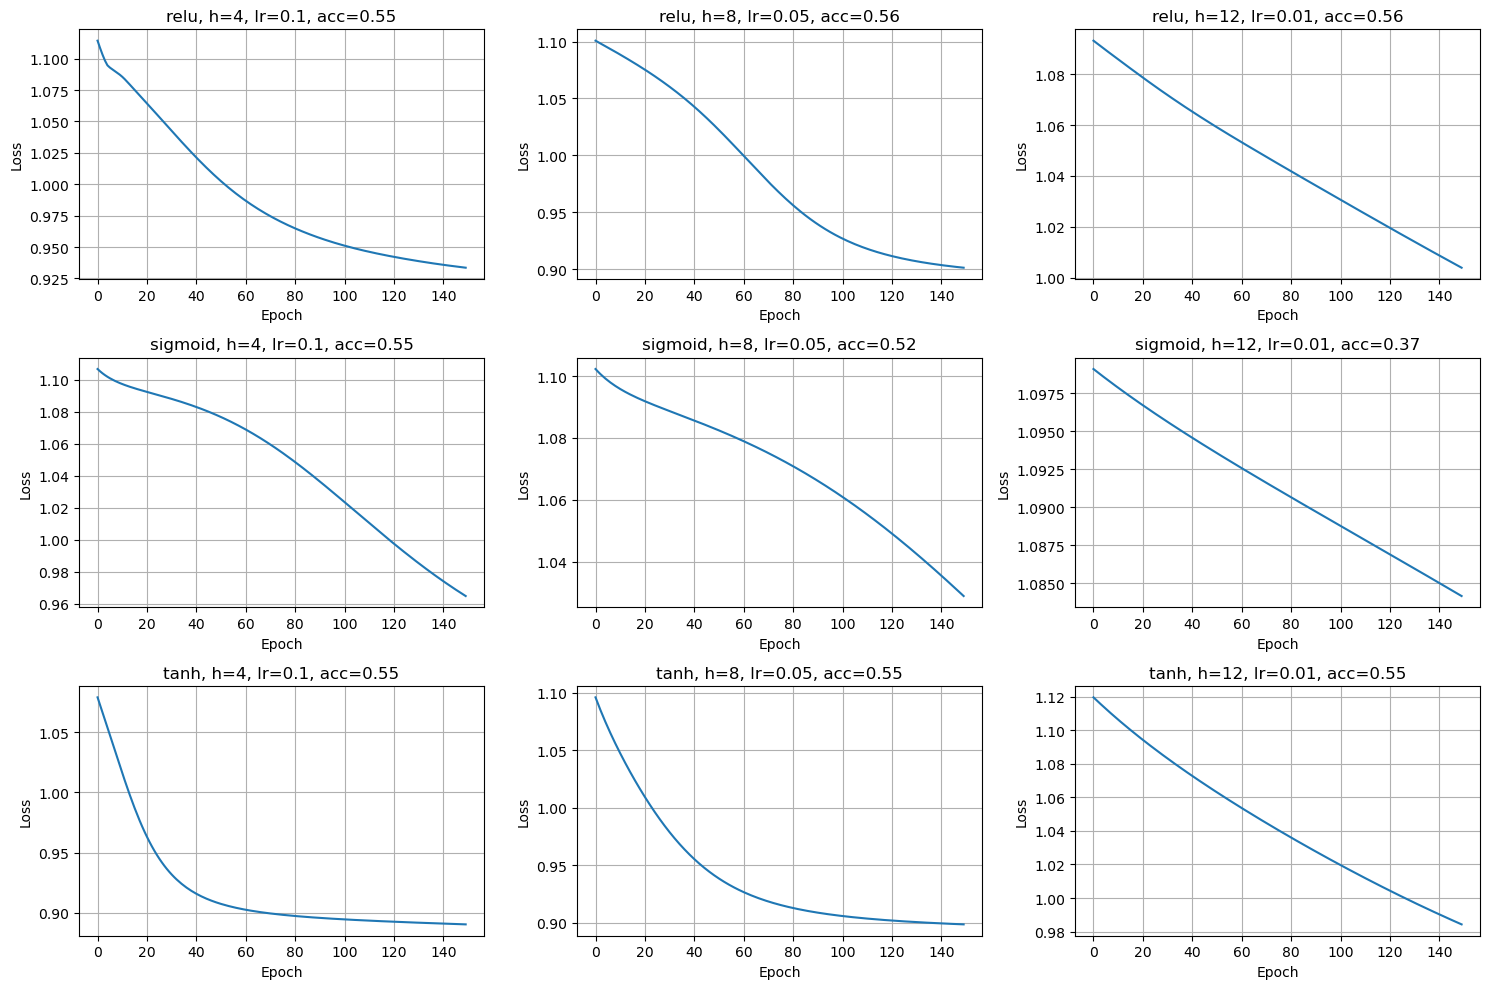

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class Neironetwork:
    def __init__(self, input_size, hidden_size, output_size, activation):
        self.w1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
        self.activation_func = activation

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def activate(self, x):
        if self.activation_func == 'sigmoid':
            return self.sigmoid(x)
        elif self.activation_func == 'tanh':
            return self.tanh(x)
        elif self.activation_func == 'relu':
            return self.relu(x)

    def forward(self, X):
        self.z1 = X @ self.w1 + self.b1
        self.a1 = self.activate(self.z1)
        self.z2 = self.a1 @ self.w2 + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, X, y, output, lr):
        m = y.shape[0]
        dz2 = output - y
        dw2 = self.a1.T @ dz2 / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        if self.activation_func == 'sigmoid':
            dz1 = dz2 @ self.w2.T * (self.a1 * (1 - self.a1))
        elif self.activation_func == 'tanh':
            dz1 = dz2 @ self.w2.T * (1 - self.a1 ** 2)
        elif self.activation_func == 'relu':
            dz1 = dz2 @ self.w2.T * (self.a1 > 0)

        dw1 = X.T @ dz1 / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        self.w2 -= lr * dw2
        self.b2 -= lr * db2
        self.w1 -= lr * dw1
        self.b1 -= lr * db1

    def train(self, X, y, epochs, lr):
        self.losses = []
        for _ in range(epochs):
            out = self.forward(X)
            loss = -np.sum(y * np.log(out + 1e-9)) / y.shape[0]
            self.losses.append(loss)
            self.backward(X, y, out, lr)

    def predict(self, X):
        out = self.forward(X)
        return np.argmax(out, axis=1)


df = pd.read_csv("CrabAgePrediction.csv")
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
X = df.drop('Sex', axis=1).values
y = df['Sex'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
y_onehot = np.zeros((y.size, y.max() + 1))
y_onehot[np.arange(y.size), y] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42)

configs = [
    {"activation": "relu", "hidden_size": 4, "lr": 0.1},
    {"activation": "relu", "hidden_size": 8, "lr": 0.05},
    {"activation": "relu", "hidden_size": 12, "lr": 0.01},
    {"activation": "sigmoid", "hidden_size": 4, "lr": 0.1},
    {"activation": "sigmoid", "hidden_size": 8, "lr": 0.05},
    {"activation": "sigmoid", "hidden_size": 12, "lr": 0.01},
    {"activation": "tanh", "hidden_size": 4, "lr": 0.1},
    {"activation": "tanh", "hidden_size": 8, "lr": 0.05},
    {"activation": "tanh", "hidden_size": 12, "lr": 0.01},
]

plt.figure(figsize=(15, 10))
for i, cfg in enumerate(configs, 1):
    model = Neironetwork(input_size=X.shape[1], hidden_size=cfg["hidden_size"], output_size=3, activation=cfg["activation"])
    model.train(X_train, y_train, epochs=150, lr=cfg["lr"])
    preds = model.predict(X_test)
    acc = accuracy_score(np.argmax(y_test, axis=1), preds)
    plt.subplot(3, 3, i)
    plt.plot(model.losses)
    plt.title(f'{cfg["activation"]}, h={cfg["hidden_size"]}, lr={cfg["lr"]}, acc={acc:.2f}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

plt.tight_layout()
plt.show()


враховуючи шо статі в нашому випадку 3, то точніть норм. найвища точність у вийшла у релу з 8 нейронами, learning rate - 0.05. швидкість\якість - tanh, теж 8 нейроны, learning rate - 0.05 